In [6]:
import pandas as pd
import numpy as np
import Levenshtein
from itertools import combinations
from typing import Callable
import seaborn as sns

In [2]:
def eval_annotators(
    df: pd.DataFrame, 
    score_fn: Callable[[str, str], float] = Levenshtein.distance
):
    n_annotators = df.shape[1]
    eval_mat = pd.DataFrame(
        np.zeros((n_annotators, n_annotators)),
        columns=df.columns,
        index=df.columns
    )

    for c in combinations(df.columns, 2):
        a1, a2 = c
        label_pairs = df[list(c)].values
        mean_score = np.mean([
            score_fn(l1, l2)
            for l1, l2
            in label_pairs
        ])
        eval_mat.loc[a1, a2] = mean_score
        eval_mat.loc[a2, a1] = mean_score
    
    return eval_mat

[Text(0.5, 1.0, 'Phase 3')]

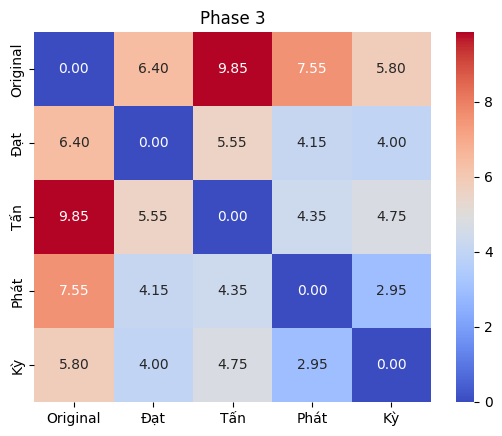

In [15]:
import re
phase = 3
df = (
    pd.read_csv(f"phase{phase}.csv")
    .set_index("index")
    .map(str.lower)
    .map(lambda s: re.sub(r"(\s+?)\1+", r"\1", s))
)
sns.heatmap(eval_annotators(df), annot=True, fmt=".2f", cmap="coolwarm").set(title=f"Phase {phase}")